<a href="https://colab.research.google.com/github/Malcolm777/Trading_algorithms/blob/master/NFLX_8_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Moving Average Convergence/Divergence (MACD) crossover 
#                       to determine when to buy and sell stock 

In [3]:
#Import the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [4]:
#Load the data 
from google.colab import files 
uploaded = files.upload()

Saving NFLX_8_31.csv to NFLX_8_31 (1).csv


In [5]:
#Store the data 
df = pd.read_csv('NFLX_8_31.csv')

#Set the index as date 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-03,2019-09-03,290.820007,293.899994,288.059998,289.290009,289.290009,3682800
2019-09-04,2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500
2019-09-05,2019-09-05,285.320007,293.970001,282.790009,293.250000,293.250000,8966800
2019-09-06,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600
2019-09-09,2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700
...,...,...,...,...,...,...,...
2020-08-25,2020-08-25,488.190002,492.470001,485.089996,490.579987,490.579987,5727700
2020-08-26,2020-08-26,492.500000,549.039978,492.079987,547.530029,547.530029,20373700
2020-08-27,2020-08-27,537.780029,541.000000,521.250000,526.270020,526.270020,9062900
2020-08-28,2020-08-28,532.000000,539.000000,522.000000,523.890015,523.890015,4417500


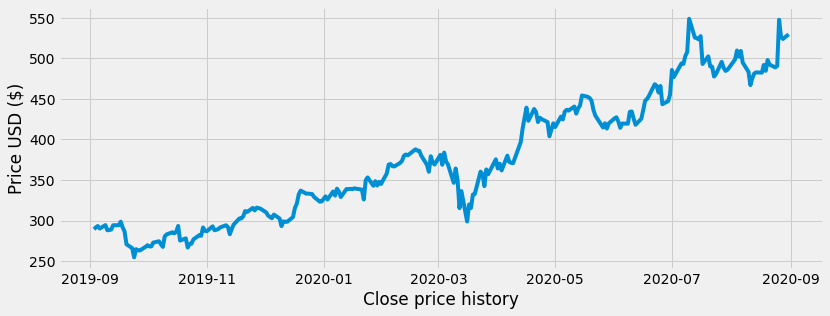

In [6]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close') 
plt.xlabel('Close price history')
plt.ylabel('Price USD ($)')
plt.show()

In [7]:
#Calculate the MACD and single line indicators 


#Calculate the short term EMA 
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 

#Calculate the long term EMA 
LongEMA = df.Close.ewm(span=26, adjust=False).mean() 

#Calculate the MACD 
MACD = ShortEMA - LongEMA 

#Calculate the signal line 
signal = MACD.ewm(span=9, adjust=False).mean()

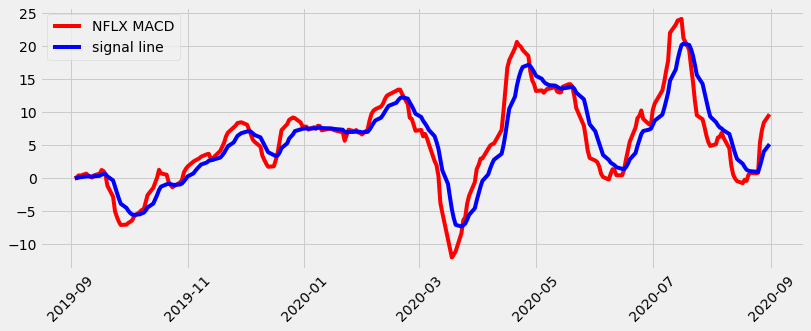

In [8]:
#Plot the chart 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label='NFLX MACD', color='red')
plt.plot(df.index, signal, label='signal line', color='blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [9]:
#Create new columns for the data 
df['MACD'] = MACD
df['Signal line'] = signal 

#show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
2019-09-03,2019-09-03,290.820007,293.899994,288.059998,289.290009,289.290009,3682800,0.000000,0.000000
2019-09-04,2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500,0.177890,0.035578
2019-09-05,2019-09-05,285.320007,293.970001,282.790009,293.250000,293.250000,8966800,0.453242,0.119111
2019-09-06,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600,0.418112,0.178911
2019-09-09,2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700,0.718471,0.286823
...,...,...,...,...,...,...,...,...,...
2020-08-25,2020-08-25,488.190002,492.470001,485.089996,490.579987,490.579987,5727700,0.836702,0.985141
2020-08-26,2020-08-26,492.500000,549.039978,492.079987,547.530029,547.530029,20373700,5.430994,1.874312
2020-08-27,2020-08-27,537.780029,541.000000,521.250000,526.270020,526.270020,9062900,7.272664,2.953982
2020-08-28,2020-08-28,532.000000,539.000000,522.000000,523.890015,523.890015,4417500,8.442830,4.051752


In [10]:
#Create a function to signal when to buy and sell an asset 
def buy_sell(signal): 
  Buy = []
  Sell = []
  flag = -1 

  for i in range(0, len(signal)): 
    if signal['MACD'][i] > signal['Signal line'][i]: 
      Sell.append(np.nan)
      if flag != 1: 
        Buy.append(signal['Close'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]: 
      Buy.append(np.nan)
      if flag != 0: 
        Sell.append(signal['Close'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else: 
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
    

In [11]:
#Create a buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0] 
df['Sell_Signal_Price'] = a[1] 


In [12]:
#Show the data 
df 

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2019-09-03,2019-09-03,290.820007,293.899994,288.059998,289.290009,289.290009,3682800,0.000000,0.000000,NaN,NaN
2019-09-04,2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500,0.177890,0.035578,291.519989,NaN
2019-09-05,2019-09-05,285.320007,293.970001,282.790009,293.250000,293.250000,8966800,0.453242,0.119111,NaN,NaN
2019-09-06,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600,0.418112,0.178911,NaN,NaN
2019-09-09,2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700,0.718471,0.286823,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,2020-08-25,488.190002,492.470001,485.089996,490.579987,490.579987,5727700,0.836702,0.985141,NaN,NaN
2020-08-26,2020-08-26,492.500000,549.039978,492.079987,547.530029,547.530029,20373700,5.430994,1.874312,547.530029,NaN
2020-08-27,2020-08-27,537.780029,541.000000,521.250000,526.270020,526.270020,9062900,7.272664,2.953982,NaN,NaN
2020-08-28,2020-08-28,532.000000,539.000000,522.000000,523.890015,523.890015,4417500,8.442830,4.051752,NaN,NaN


<function matplotlib.pyplot.show>

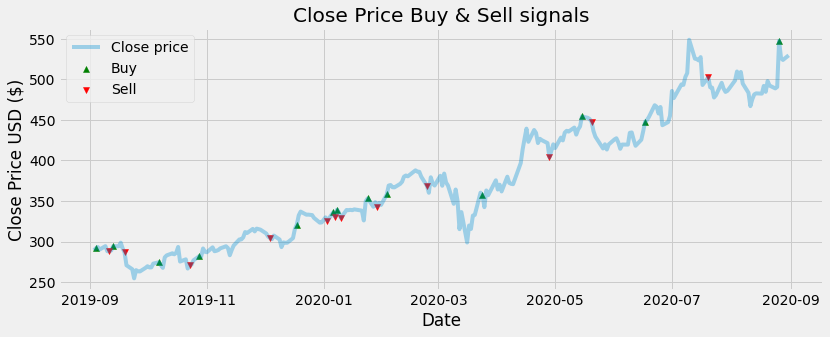

In [13]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha = 1)
plt.plot(df['Close'], label='Close price', alpha = 0.35) 
plt.title('Close Price Buy & Sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show